# 画像の足し算
opencvで画像はnumpyの配列なので、足すとそのまま足される。

In [2]:
import numpy as np
import cv2

x_image = np.uint8([100])
y_image = np.uint8([10])

x_image + y_image

array([110], dtype=uint8)

uint8になっているので、255を超えると0に戻る

In [3]:
x_image = np.uint8([250])
y_image = np.uint8([10])

x_image + y_image

array([4], dtype=uint8)

`cv.add()`を使うと、最大値の255で止まり、255を超えても0に戻らない。ただし、`dtype`を指定する必要がある。

In [4]:
cv2.add(x_image, y_image, dtype=cv2.CV_8U)

array([[255],
       [  0],
       [  0],
       [  0]], dtype=uint8)

何も指定しないとfloat64になって、255の限界などは特になく浮動小数点数として扱われる。

In [5]:
z_image = cv2.add(x_image, y_image)
print(z_image)
print(z_image.dtype)
print(z_image.shape)

[[260.]
 [  0.]
 [  0.]
 [  0.]]
float64
(4, 1)


自動的に4チャンネルの画像になってしまうのはなぜだろう? [ドキュメント](https://docs.opencv.org/4.x/d2/de8/group__core__array.html)と挙動が違う.

# 画像の重み付き和
`cv2.addWeighted()`を使う. 引数は
`cv2.addWighted(a_image, alpha, b_image, beta, gamma)`となっていて、`gamma`は定数項になるようだ。

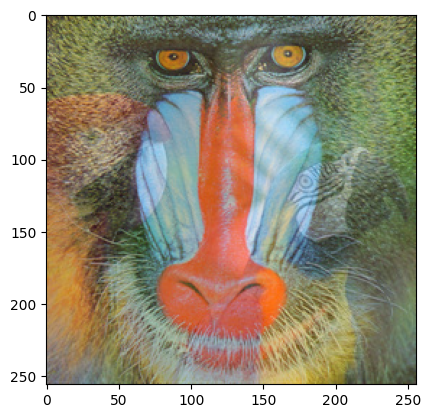

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x_image = cv2.cvtColor(cv2.imread('mandrill.jpg'), cv2.COLOR_BGR2RGB)
y_image = cv2.cvtColor(cv2.imread('parrots.jpg'), cv2.COLOR_BGR2RGB)

z_image = cv2.addWeighted(x_image, 0.7, y_image, 0.3, 0)
plt.imshow(z_image)


うっすらとオウムが見えている。